In [1]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.2-cp36-none-any.whl size=4120191 sha256=06593c89b9a6e09d68c939e19982918afd44b33d3783d44bffa15bb497505c01
  Stored in directory: /root/.cache/pip/wheels/9c/f9/fc/bc052ce743a03f94ccc7fda73d1d389ce98216c6ffaaf65afc
Successfully built japanize-matplotlib


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from datetime import datetime
import numpy as np
from fastprogress import progress_bar as pb

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/japanize_matplotlib.py:15: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [3]:
import warnings
warnings.simplefilter('ignore')

In [4]:
FILEPATH_FMT = 's3://fin-app/stockprice_concat/{code}.csv'

In [6]:
df_stocklist = pd.read_csv('s3://fin-app/stocklist/stocklist.csv')

In [7]:
df_stocklist.head()

,銘柄コード,銘柄名,市場名,業種分類,単元株数,日経225採用銘柄
0,1301,(株)極洋,東証1部,水産・農林業,100,NaN
1,1332,日本水産(株),東証1部,水産・農林業,100,1.0
2,1333,マルハニチロ(株),東証1部,水産・農林業,100,1.0
3,1352,(株)ホウスイ,東証1部,卸売業,100,NaN
4,1376,カネコ種苗(株),東証1部,水産・農林業,100,NaN


In [8]:
codes = df_stocklist['銘柄コード'].unique()

In [9]:
df_dict = {}
skipped_code = []

for code in pb(codes):
    try:
        df_dict[code] = pd.read_csv(FILEPATH_FMT.format(code=code))
    except Exception:
        skipped_code.append(code)

In [10]:
valid_codes = list(df_dict.keys())

In [11]:
code_mask = df_stocklist['銘柄コード'].map(lambda x: x in valid_codes)

In [12]:
df_valid_stocklidt = df_stocklist[code_mask]

In [13]:
for code, df in df_dict.items():
    df_dict[code] = df[['日付', '終値']]

In [14]:
 for code, df in df_dict.items():
    df_dict[code]['日付'] = pd.to_datetime(df_dict[code]['日付'])

In [15]:
df_dict[codes[0]].head()

,日付,終値
0,1983-01-04,141
1,1983-01-05,153
2,1983-01-06,160
3,1983-01-07,155
4,1983-01-08,152


In [55]:
df_sample_stock = df_valid_stocklidt.sample(50)

In [56]:
df_sample_stock['銘柄コード'].tolist()

[2798,
 5563,
 4809,
 8354,
 8012,
 9913,
 9651,
 5857,
 2602,
 4295,
 7832,
 3817,
 3823,
 4669,
 8439,
 7148,
 7997,
 3998,
 3995,
 4098,
 7988,
 7894,
 8705,
 6853,
 4704,
 7299,
 4746,
 6778,
 1795,
 7509,
 4972,
 2151,
 7869,
 2742,
 1870,
 3814,
 3529,
 8887,
 2776,
 9635,
 6877,
 3997,
 9514,
 7918,
 6192,
 2162,
 5900,
 9810,
 2291,
 3023]

In [20]:
def code2company_name(code):
    return df_stocklist[df_stocklist['銘柄コード']==int(code)]['銘柄名'].values[0]

In [21]:
def company_name2code(company_name):
    return df_stocklist[df_stocklist['銘柄名']==company_name]['銘柄コード'].values[0]

In [22]:
def company_name2industry(company_name):
    return df_stocklist[df_stocklist['銘柄名']==company_name]['業種分類'].values[0]

In [23]:
industries = df_stocklist['業種分類'].unique().tolist()

In [24]:
industries

['水産・農林業',
 '卸売業',
 '建設業',
 '非鉄金属',
 '鉱業',
 '機械',
 'サービス業',
 '金属製品',
 '情報・通信',
 '食料品',
 '医薬品',
 '不動産業',
 '陸運業',
 'その他金融業',
 '小売業',
 'その他製品',
 'REIT銘柄一覧',
 '繊維製品',
 '電気機器',
 'ガラス・土石製品',
 '証券業',
 '輸送用機器',
 '石油・石炭製品',
 '化学',
 'パルプ・紙',
 '精密機器',
 'ゴム製品',
 '鉄鋼',
 '銀行業',
 '保険業',
 '倉庫・運輸関連業',
 '海運業',
 '空運業',
 '電気・ガス業']

In [25]:
df_industry = pd.DataFrame({
    'industry': industries
})

In [26]:
df_industry[:3]

,industry
0,水産・農林業
1,卸売業
2,建設業


In [27]:
def industry2color(industry, cmap_name='hsv'):
    n = df_industry[df_industry['industry']==industry].index.values[0]
    cmap = plt.cm.get_cmap(cmap_name, len(df_industry))
    return cmap(n)

In [28]:
industry2color('建設業')

(1.0, 0.35795490340944885, 0.0, 1.0)

In [57]:
df_merged = None

for code, df in pb(df_dict.items()):
    if code not in df_sample_stock['銘柄コード'].tolist():
        continue
    # print(code)
    # print(df)
    if df_merged is None:
        df_merged = df.rename(columns={'終値': code})
    else:
        df_merged = pd.merge(df_merged, df.rename(columns={'終値': code}), how='outer', on='日付')

In [58]:
df_merged

,日付,1795,1870,2151,2162,2291,2602,2742,2776,2798,3023,3529,3814,3817,3823,3995,3997,3998,4098,4295,4669,4704,4746,4809,4972,5563,5857,5900,6192,6778,6853,6877,7148,7299,7509,7832,7869,7894,7918,7988,7997,8012,8354,8439,8705,8887,9514,9635,9651,9810,9913
0,1994-11-02,2330.0,NaN,NaN,NaN,NaN,830.0,NaN,NaN,NaN,NaN,600,NaN,NaN,NaN,NaN,NaN,NaN,715.0,NaN,NaN,NaN,NaN,NaN,NaN,431.0,NaN,NaN,NaN,NaN,700.0,NaN,NaN,NaN,NaN,NaN,NaN,2190.0,1550.0,1560.0,NaN,974.0,NaN,NaN,NaN,NaN,NaN,895.0,1730.0,385.0,2050.0
1,1994-11-07,1850.0,NaN,NaN,NaN,NaN,820.0,NaN,NaN,NaN,NaN,604,NaN,NaN,NaN,NaN,NaN,NaN,690.0,NaN,NaN,NaN,NaN,NaN,NaN,439.0,NaN,NaN,NaN,NaN,695.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1580.0,1520.0,705.0,970.0,NaN,NaN,NaN,NaN,NaN,850.0,NaN,385.0,2050.0
2,1994-11-08,1850.0,NaN,NaN,NaN,NaN,839.0,NaN,NaN,NaN,NaN,597,NaN,NaN,NaN,NaN,NaN,NaN,690.0,NaN,NaN,NaN,NaN,NaN,NaN,432.0,NaN,NaN,NaN,NaN,680.0,NaN,NaN,NaN,NaN,NaN,NaN,2200.0,1570.0,1550.0,NaN,969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385.0,2050.0
3,1994-11-09,1800.0,NaN,NaN,NaN,NaN,831.0,NaN,NaN,NaN,NaN,582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,NaN,NaN,NaN,670.0,NaN,NaN,NaN,NaN,NaN,NaN,2190.0,1550.0,1550.0,NaN,940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385.0,2200.0
4,1994-11-10,1900.0,NaN,NaN,NaN,NaN,823.0,NaN,NaN,NaN,NaN,580,NaN,NaN,NaN,NaN,NaN,NaN,684.0,NaN,NaN,NaN,NaN,NaN,NaN,406.0,NaN,NaN,NaN,NaN,660.0,NaN,NaN,NaN,NaN,NaN,NaN,2160.0,1550.0,1520.0,NaN,929.0,NaN,NaN,NaN,NaN,NaN,NaN,1570.0,377.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9287,2002-08-01,NaN,NaN,NaN,NaN,NaN,321.0,NaN,NaN,NaN,NaN,106,NaN,NaN,NaN,NaN,NaN,NaN,118.0,NaN,NaN,2925.0,810.0,NaN,NaN,185.0,NaN,530.0,NaN,82500.0,214.0,NaN,NaN,203.0,535.0,NaN,320.0,NaN,NaN,1165.0,134.0,539.0,NaN,NaN,NaN,70000.0,NaN,278.0,510.0,79.0,260.0
9288,2002-08-06,NaN,NaN,NaN,NaN,NaN,331.0,NaN,NaN,NaN,NaN,96,NaN,NaN,NaN,NaN,NaN,NaN,111.0,NaN,155.0,2775.0,802.0,NaN,395.0,173.0,NaN,505.0,NaN,76500.0,215.0,NaN,NaN,201.0,520.0,NaN,NaN,NaN,NaN,1165.0,122.0,550.0,NaN,NaN,NaN,63500.0,NaN,290.0,530.0,NaN,240.0
9289,2003-08-07,NaN,NaN,NaN,NaN,NaN,309.0,NaN,349000.0,NaN,NaN,88,NaN,NaN,NaN,NaN,NaN,NaN,131.0,660000.0,NaN,1795.0,810.0,NaN,800.0,190.0,NaN,560.0,NaN,81600.0,278.0,NaN,NaN,268.0,NaN,NaN,NaN,NaN,NaN,1221.0,103.0,601.0,NaN,NaN,NaN,65300.0,NaN,267.0,NaN,145.0,415.0
9290,1983-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256,NaN,NaN,NaN,NaN,NaN,NaN,1330.0,NaN,NaN,NaN,NaN,NaN,NaN,283.0,NaN,NaN,NaN,NaN,491.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1170.0,200.0,366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df_merged['日付'] = pd.to_datetime(df_merged['日付'])

In [60]:
df_merged = df_merged.set_index('日付')

In [61]:
df_merged.sort_index(inplace=True)

In [62]:
df_merged = df_merged[df_merged.index > '2014-01-01']

In [63]:
df_merged

,1795,1870,2151,2162,2291,2602,2742,2776,2798,3023,3529,3814,3817,3823,3995,3997,3998,4098,4295,4669,4704,4746,4809,4972,5563,5857,5900,6192,6778,6853,6877,7148,7299,7509,7832,7869,7894,7918,7988,7997,8012,8354,8439,8705,8887,9514,9635,9651,9810,9913
日付,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-06,310.0,936.0,1331.0,373.0,330.0,342.0,1222.0,114.0,158300.0,474.0,121,765.0,1345.0,49250.0,NaN,NaN,NaN,269.0,1142.0,204.0,3535.0,1499.0,807.0,1119.0,314.0,1811.0,586.0,NaN,50200.0,408.0,3320.0,1067.0,483.0,685.0,2312.0,386.0,108.0,867.0,2790.0,116.0,1287.0,457.0,3415.0,329.0,666.0,609.0,185.0,966.0,389.0,472.0
2014-01-07,313.0,895.0,1324.0,373.0,335.0,336.0,1240.0,111.0,159000.0,478.0,121,759.0,1348.0,47300.0,NaN,NaN,NaN,265.0,1145.0,205.0,3600.0,1497.0,801.0,1110.0,304.0,1791.0,587.0,NaN,48200.0,403.0,3435.0,1065.0,483.0,NaN,2302.0,381.0,110.0,865.0,2767.0,114.0,1271.0,452.0,3355.0,320.0,662.0,621.0,186.0,965.0,385.0,480.0
2014-01-08,NaN,911.0,1311.0,378.0,350.0,341.0,1250.0,113.0,159900.0,480.0,123,755.0,1389.0,49200.0,NaN,NaN,NaN,270.0,1148.0,206.0,3650.0,1502.0,805.0,1112.0,311.0,1805.0,591.0,NaN,50100.0,429.0,3450.0,1097.0,483.0,698.0,2354.0,395.0,112.0,864.0,2833.0,117.0,1295.0,460.0,3435.0,312.0,662.0,680.0,185.0,983.0,385.0,484.0
2014-01-09,320.0,903.0,1309.0,376.0,359.0,344.0,1299.0,111.0,161000.0,485.0,123,742.0,1384.0,48400.0,NaN,NaN,NaN,277.0,1131.0,209.0,3610.0,1504.0,801.0,1134.0,311.0,1824.0,595.0,NaN,52500.0,457.0,3435.0,1090.0,489.0,690.0,2313.0,398.0,114.0,868.0,2820.0,129.0,1292.0,457.0,3365.0,314.0,662.0,673.0,185.0,975.0,384.0,485.0
2014-01-10,NaN,906.0,1306.0,370.0,363.0,341.0,1288.0,113.0,162000.0,485.0,123,745.0,1353.0,47850.0,NaN,NaN,NaN,275.0,1131.0,210.0,3500.0,1516.0,795.0,1159.0,312.0,1846.0,595.0,NaN,52700.0,438.0,3465.0,1083.0,483.0,700.0,2318.0,402.0,116.0,867.0,2838.0,125.0,1300.0,460.0,3410.0,304.0,660.0,692.0,184.0,979.0,385.0,494.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-09,3155.0,809.0,1314.0,584.0,2110.0,3910.0,2643.0,141.0,2511.0,923.0,838,1358.0,2540.0,252.0,735.0,1362.0,4095.0,2679.0,809.0,763.0,5740.0,3825.0,2024.0,1468.0,183.0,2690.0,726.0,308.0,1263.0,445.0,3905.0,1066.0,3540.0,3805.0,6666.0,1900.0,NaN,670.0,3105.0,NaN,1667.0,2154.0,5850.0,160.0,831.0,765.0,2447.0,876.0,5230.0,558.0
2019-12-10,3190.0,815.0,1318.0,615.0,2111.0,3930.0,2711.0,142.0,2516.0,921.0,835,1350.0,2585.0,255.0,743.0,1382.0,4410.0,2649.0,797.0,740.0,5840.0,3785.0,2024.0,1479.0,181.0,2679.0,729.0,304.0,1265.0,441.0,3840.0,1064.0,3600.0,NaN,6682.0,1919.0,NaN,667.0,3105.0,964.0,1666.0,2128.0,5920.0,160.0,831.0,764.0,2448.0,894.0,5160.0,550.0
2019-12-11,3175.0,799.0,1312.0,587.0,2105.0,3820.0,2723.0,139.0,2520.0,929.0,831,1339.0,2572.0,261.0,747.0,1431.0,4180.0,2637.0,800.0,735.0,5780.0,3745.0,2022.0,1508.0,180.0,2628.0,729.0,298.0,1252.0,438.0,3795.0,1050.0,3585.0,NaN,6671.0,1917.0,NaN,666.0,3090.0,962.0,1654.0,2135.0,5880.0,162.0,831.0,754.0,2460.0,903.0,5180.0,556.0


In [64]:
df_corr = df_merged.corr()

In [65]:
df_corr

,1795,1870,2151,2162,2291,2602,2742,2776,2798,3023,3529,3814,3817,3823,3995,3997,3998,4098,4295,4669,4704,4746,4809,4972,5563,5857,5900,6192,6778,6853,6877,7148,7299,7509,7832,7869,7894,7918,7988,7997,8012,8354,8439,8705,8887,9514,9635,9651,9810,9913
1795,1.000000,-0.531266,-0.234930,-0.209461,0.770793,0.807610,0.247163,0.245543,-0.116770,0.572594,0.701352,0.614369,0.333225,-0.131376,-0.816631,-0.974268,0.148438,0.772440,-0.516247,-0.190432,0.604510,0.700223,0.460839,0.338244,-0.291063,0.546877,0.183098,-0.793708,-0.069433,-0.279907,-0.231349,-0.037318,0.636148,0.768217,0.851452,0.908353,0.591395,-0.712124,-0.603949,0.569667,0.331160,0.785936,0.649084,-0.207981,0.408259,0.191892,0.766412,-0.670423,0.525576,0.473972
1870,-0.531266,1.000000,0.330158,0.339125,-0.334913,-0.353189,0.028050,-0.186783,0.141689,-0.082308,-0.268289,-0.223080,0.064098,0.138768,0.751527,0.652477,0.392184,-0.350796,0.466185,0.377422,-0.134665,-0.213888,0.095359,0.013785,0.436240,-0.133732,0.251936,0.662926,0.086556,0.126751,0.350306,-0.023773,-0.269672,-0.368910,-0.385728,-0.392652,-0.170153,0.632256,0.517512,-0.140802,0.101305,-0.530052,-0.166716,0.050631,0.058624,0.248051,-0.328279,0.494457,0.048518,-0.279933
2151,-0.234930,0.330158,1.000000,0.557427,-0.002221,-0.007098,0.043221,0.381988,0.130465,0.149015,0.058583,-0.022224,0.157032,0.156428,0.779884,0.579456,0.043134,0.022466,0.406053,0.316108,0.118449,0.080389,0.170837,0.294333,0.530036,0.123742,0.384742,0.270342,0.172289,0.504186,0.533388,0.141072,0.134697,0.060685,-0.099575,-0.139347,0.177673,0.240516,0.342713,0.154926,0.370646,-0.397313,0.170095,0.261739,0.252751,0.375555,-0.016962,0.322873,0.079892,0.401171
2162,-0.209461,0.339125,0.557427,1.000000,0.321951,0.280355,0.389075,0.274248,-0.105626,0.471870,0.398650,0.259209,0.593417,-0.106512,0.789473,0.909434,-0.054950,0.313923,0.432644,0.503863,0.453271,0.409907,0.496750,0.607576,0.666410,0.198504,0.532015,0.398773,-0.069724,0.170262,0.689644,0.139032,0.460660,0.333668,-0.021347,-0.107032,0.548155,0.011017,0.659419,0.471412,0.653386,-0.218828,0.415877,-0.092900,0.545560,0.505088,0.324125,0.297937,0.398430,0.266300
2291,0.770793,-0.334913,-0.002221,0.321951,1.000000,0.984660,0.357816,0.398404,-0.123162,0.808252,0.988343,0.792476,0.627379,-0.139334,0.608573,0.667342,0.586772,0.985434,-0.289918,0.072565,0.808278,0.885941,0.664347,0.787227,0.152806,0.606508,0.442748,-0.527145,-0.074457,-0.189652,0.179432,0.105272,0.978296,0.993578,0.759108,0.768200,0.944328,-0.749784,-0.176606,0.828138,0.677553,0.620829,0.843431,-0.160371,0.683812,0.545929,0.997309,-0.471640,0.744311,0.614653
2602,0.807610,-0.353189,-0.007098,0.280355,0.984660,1.000000,0.369106,0.338683,-0.130412,0.818257,0.965501,0.787200,0.615870,-0.147411,-0.169941,-0.169820,-0.205910,0.983290,-0.353226,0.030527,0.797558,0.907049,0.670748,0.722878,0.110634,0.669012,0.450829,-0.567271,-0.076394,-0.177593,0.120397,0.074555,0.947081,0.988245,0.830621,0.752901,0.939215,-0.749806,-0.214783,0.822551,0.660160,0.677833,0.820577,-0.214763,0.674489,0.497450,0.990298,-0.443420,0.754282,0.602184
2742,0.247163,0.028050,0.043221,0.389075,0.357816,0.369106,1.000000,0.130521,-0.218699,0.498377,0.357946,0.421189,0.729634,-0.232752,0.507500,0.373206,0.422729,0.331846,0.253517,0.652036,0.631227,0.605331,0.678352,0.313522,-0.009604,0.247847,0.430412,-0.118993,-0.165390,-0.366660,0.168097,-0.132267,0.347193,0.340588,0.352305,0.285060,0.291715,-0.046505,0.331178,0.397878,0.458229,0.159978,0.587519,-0.493791,0.496972,0.083504,0.342243,0.003472,0.439436,-0.035337
2776,0.245543,-0.186783,0.381988,0.274248,0.398404,0.338683,0.130521,1.000000,-0.108943,0.294396,0.421937,0.114597,0.173435,-0.090945,0.495643,0.330469,0.661160,0.360175,0.357600,-0.002623,0.406686,0.276630,0.146052,0.420412,0.197592,0.271493,0.125947,-0.306334,-0.055854,0.290451,0.499250,0.358294,0.452503,0.395251,0.057114,0.425162,0.344134,-0.265930,-0.135608,0.294271,0.475309,0.082572,0.450028,0.376309,0.377854,0.271779,0.357376,-0.121919,0.087151,0.514853
2798,

In [66]:
df_corr.isna().sum()

1795    0
1870    0
2151    0
2162    0
2291    0
2602    0
2742    0
2776    0
2798    0
3023    0
3529    0
3814    0
3817    0
3823    0
3995    0
3997    0
3998    0
4098    0
4295    0
4669    0
4704    0
4746    0
4809    0
4972    0
5563    0
5857    0
5900    0
6192    0
6778    0
6853    0
6877    0
7148    0
7299    0
7509    0
7832    0
7869    0
7894    0
7918    0
7988    0
7997    0
8012    0
8354    0
8439    0
8705    0
8887    0
9514    0
9635    0
9651    0
9810    0
9913    0
dtype: int64

In [67]:
df_corr.shape

(50, 50)

In [68]:
corr_arr = df_corr.to_numpy()

In [69]:
import networkx as nx

In [70]:
node_names = [code2company_name(code) for code in df_corr.index.tolist()]

In [71]:
node_names[:5]

['(株)マサル', '矢作建設工業(株)', '(株)タケエイ', 'ｎｍｓホールディングス(株)', '福留ハム(株)']

In [110]:
def draw_corr_network(node_names, corr, corr_thresh, fig_size=(12, 12)):
    graph = nx.Graph()
    graph.add_nodes_from(node_names)
    weighted_edges = []
    node_colors = [industry2color(company_name2industry(company_name)) for company_name in node_names]

    for i in range(corr.shape[0]):
        for j in range(corr.shape[1]):
            if i == j:
                continue
            if abs(corr[i, j]) >= corr_thresh:
                #weighted_edges.append((node_names[i], node_names[j], {'weight': abs(corr[i, j])}))
                graph.add_edge(node_names[i], node_names[j], weight=abs(corr[i, j]), color='red')

    #graph.add_weighted_edges_from(weighted_edges)
    pos = nx.spring_layout(graph)

    plt.figure(figsize=fig_size)
    nx.draw_networkx(graph, pos, with_labels=True, node_color=node_colors, font_family="IPAexGothic")
    plt.axis("off")
    plt.show()

    return graph

corr_thresh : 0.5


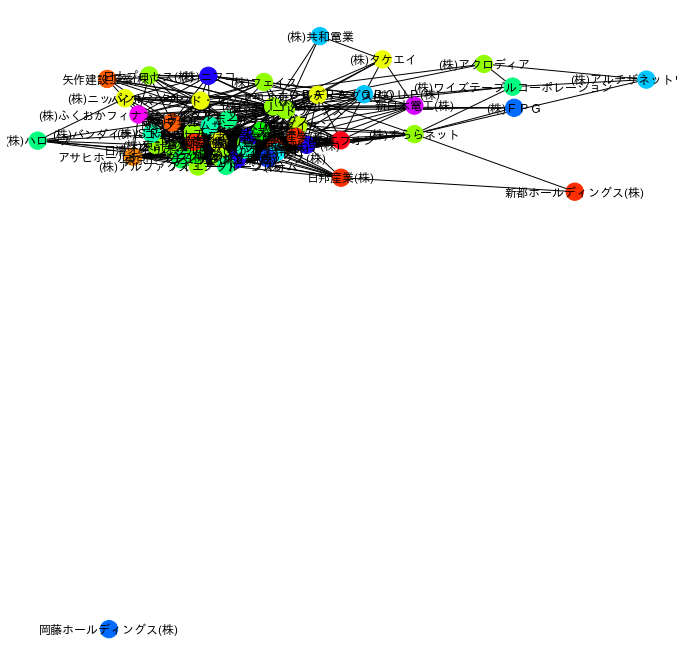

corr_thresh : 0.6


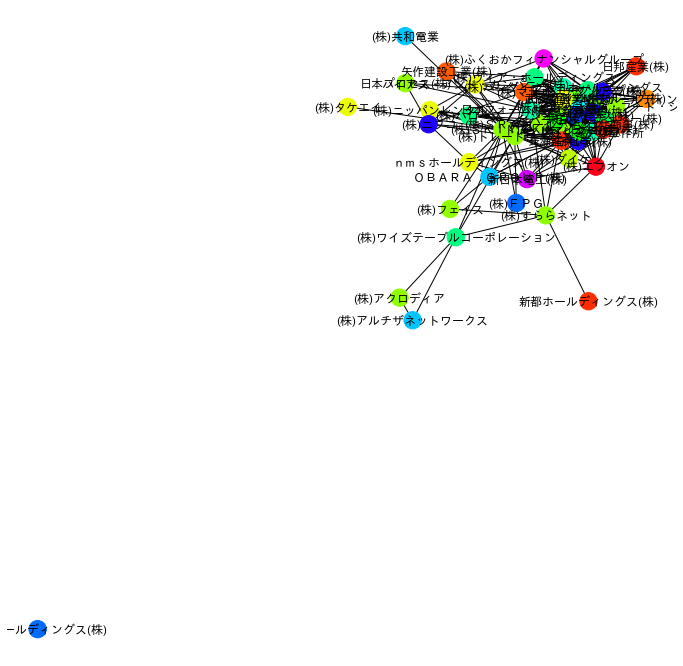

corr_thresh : 0.7


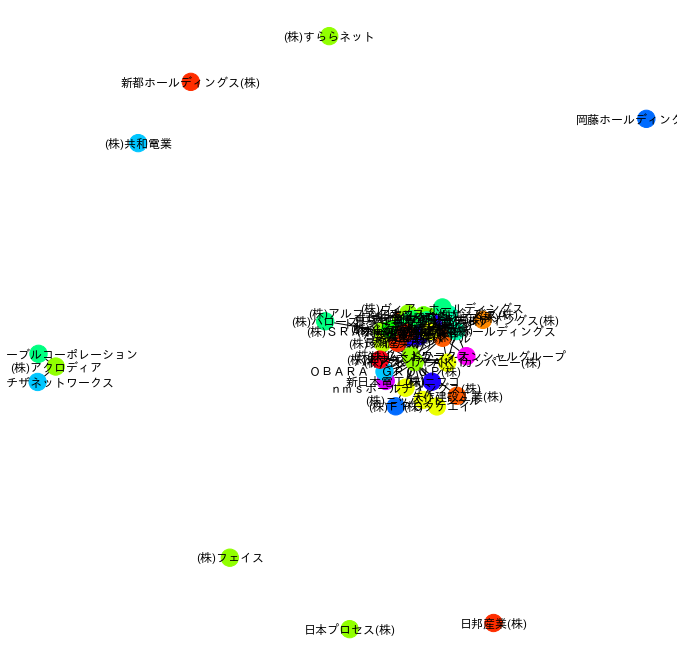

corr_thresh : 0.8


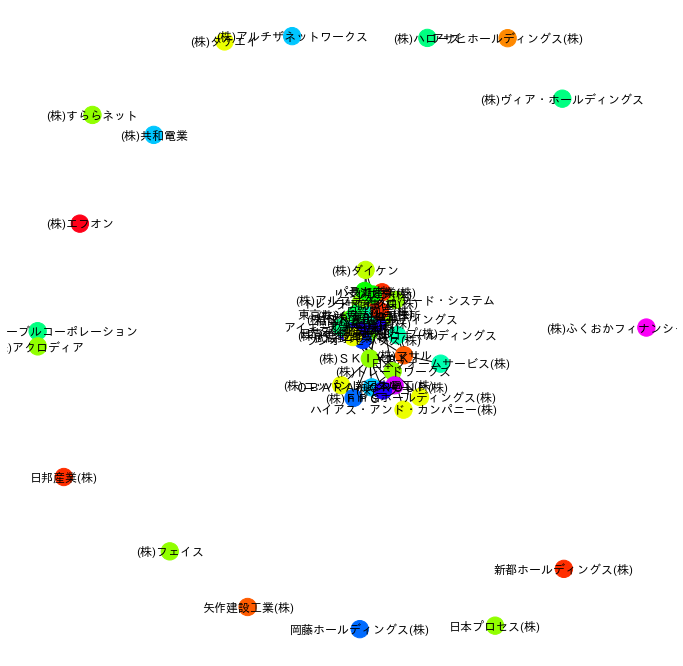

corr_thresh : 0.85


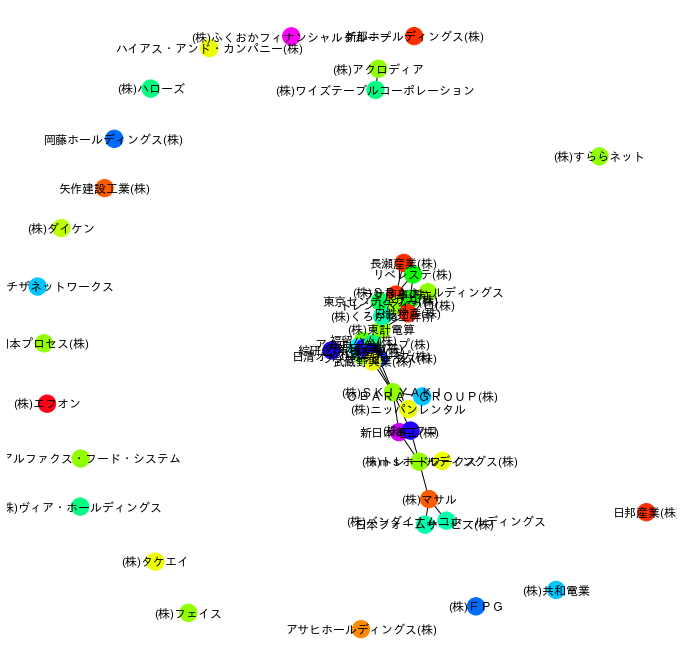

corr_thresh : 0.9


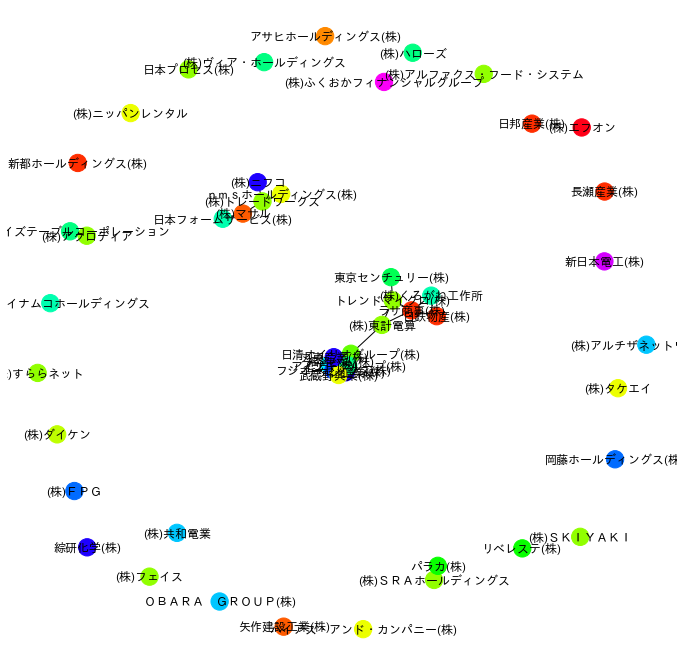

In [111]:
for corr_thresh in [0.5, 0.6, 0.7, 0.8, 0.85, 0.9]:
    print(f'corr_thresh : {corr_thresh}')
    graph = draw_corr_network(node_names, corr_arr, corr_thresh)
    print('='*50)

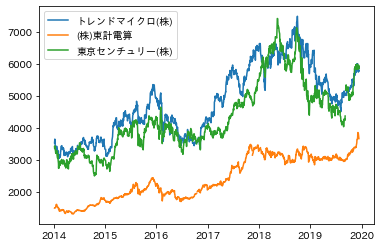

In [107]:
plt.plot(df_merged.index, df_merged[company_name2code('トレンドマイクロ(株)')], label='トレンドマイクロ(株)')
plt.plot(df_merged.index, df_merged[company_name2code('(株)東計電算')], label='(株)東計電算')
plt.plot(df_merged.index, df_merged[company_name2code('東京センチュリー(株)')], label='東京センチュリー(株)')
plt.legend()

In [95]:
df_merged[[company_name2code('トレンドマイクロ(株)'), company_name2code('(株)東計電算')]].corr()

,4704,4746
4704,1.000000,0.913151
4746,0.913151,1.000000
